Q2:

1. Accuracy

Scenario: General classification tasks with balanced datasets.

Rationale: Accuracy is a useful metric when both false positives and false negatives carry similar costs, and the dataset has a balanced number of positive and negative cases. For example, it is suitable for spam email detection when misclassifying a spam or a non-spam email has equal consequences.

2. Sensitivity

Scenario: Healthcare applications, such as disease diagnosis.

Rationale: Sensitivity focuses on minimizing false negatives, which is critical in scenarios where missing a true positive (e.g., failing to detect a disease) could have severe consequences. For example, detecting cancer in its early stages prioritizes identifying all possible positive cases even at the expense of some false positives.

3. Specificity

Scenario: Fraud detection or screening tests with high false-positive costs.

Rationale: Specificity is important when minimizing false positives is crucial. For instance, in a fraud detection system, flagging legitimate transactions as fraudulent can disrupt user experience and lead to unnecessary interventions, so specificity is prioritized.

4. Precision

Scenario: Information retrieval or recommendation systems.

Rationale: Precision is crucial in scenarios where false positives (incorrectly classified positive cases) are costly. For example, in a recommendation system for job candidates, showing irrelevant candidates (false positives) to a recruiter can decrease trust in the system. High precision ensures only the most relevant results are delivered.

Q3:

In [17]:
# Import necessary libraries
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove specified columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab = ab.drop(columns=columns_to_remove, errors='ignore')

# Drop rows with NaN values
ab = ab.dropna()

# Change data types
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

# Save the cleaned dataset
ab_reduced_noNaN = ab

# Display first few rows to verify
print(ab_reduced_noNaN.head())

# Optionally, summarize the dataset
print(ab_reduced_noNaN.info())
print(ab_reduced_noNaN.describe())


                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

Q4:

Training set size: 255
Testing set size: 64


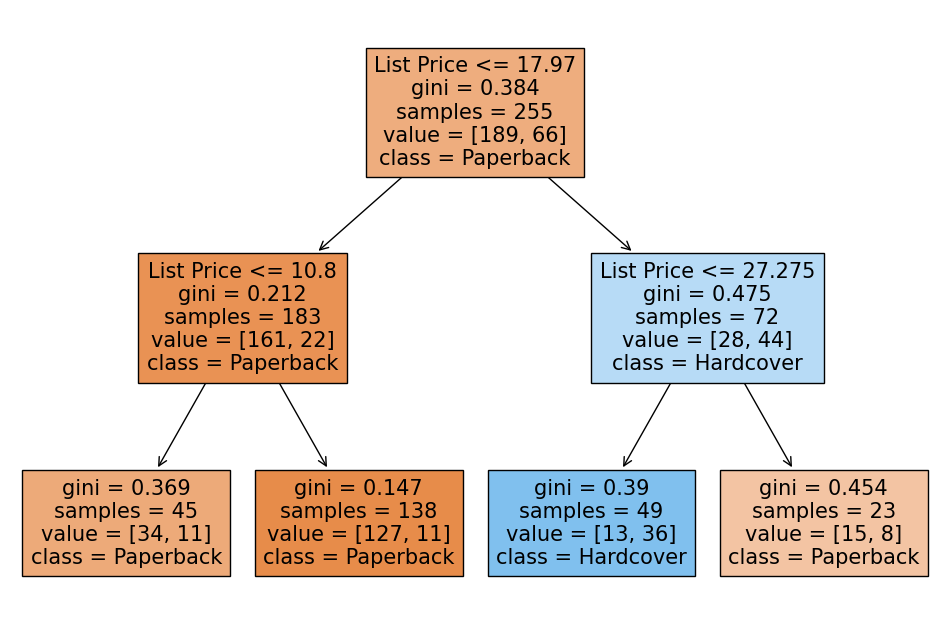

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Splitting the dataset into training and testing sets with an 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Reporting the number of observations in each dataset
print(f"Training set size: {ab_reduced_noNaN_train.shape[0]}")
print(f"Testing set size: {ab_reduced_noNaN_test.shape[0]}")

# Preparing data for classification
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Target variable
X = ab_reduced_noNaN_train[['List Price']]  # Feature variable

# Fitting a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Visualizing the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)
plt.show()


Q5:

Updated Approach to Fit and Visualize the Tree:

Prepare Features (X2): Use the columns NumPages, Thick, and List Price from the training set.

Fit Decision Tree (clf2): Set max_depth=4 to increase tree complexity.

Visualize: Use tree.plot_tree or export the tree for better readability.


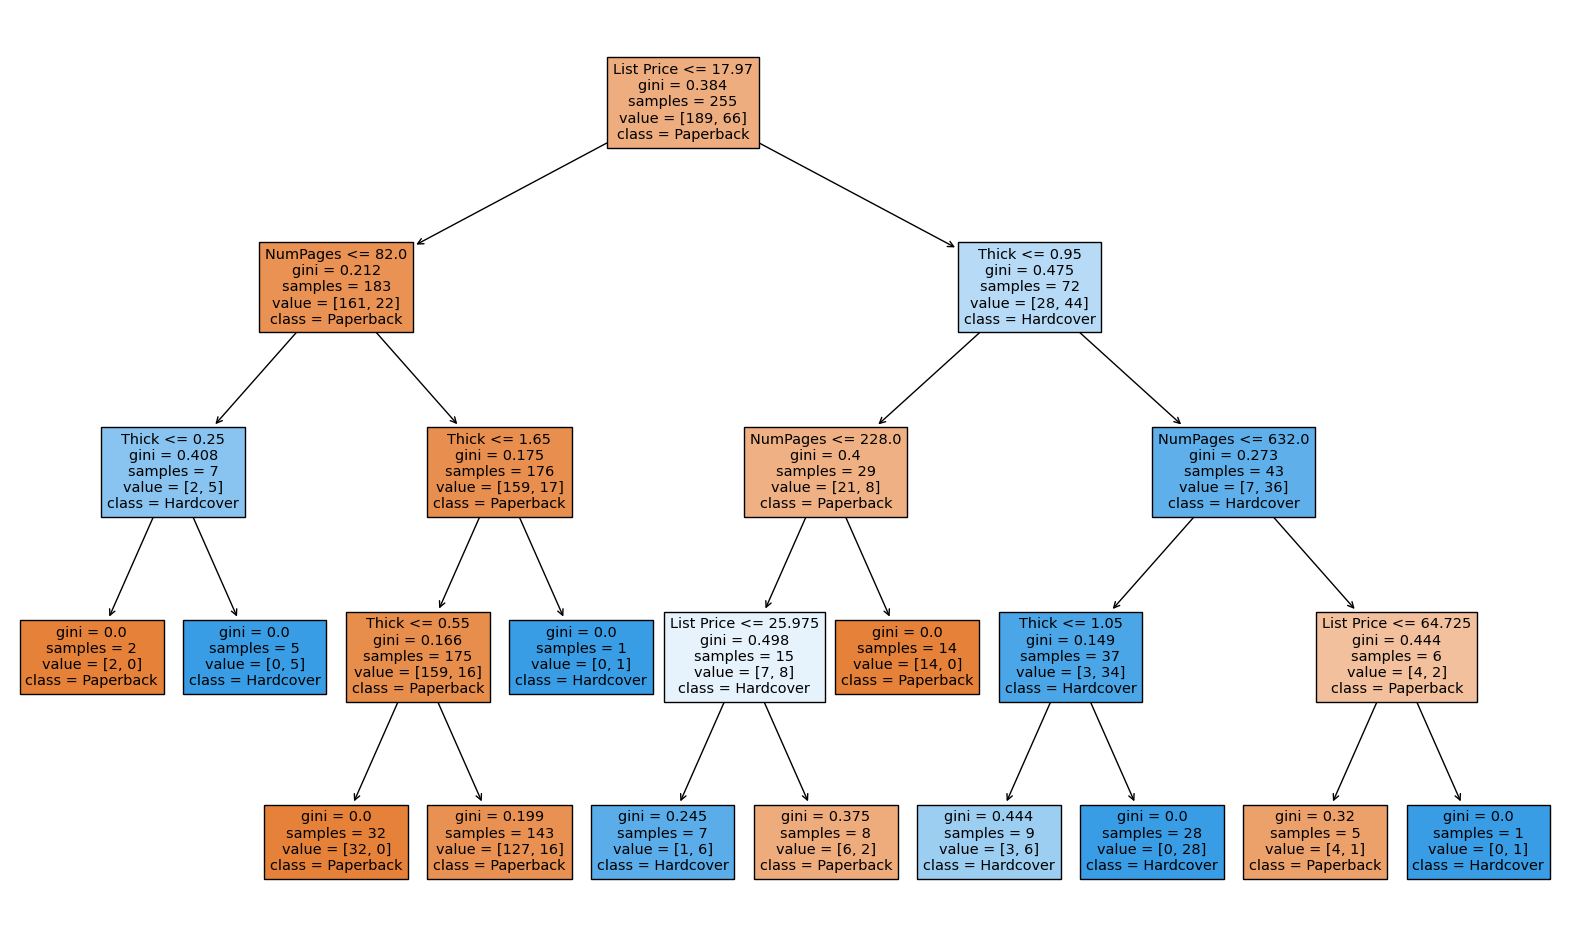

|--- List Price <= 17.97
|   |--- NumPages <= 82.00
|   |   |--- Thick <= 0.25
|   |   |   |--- class: False
|   |   |--- Thick >  0.25
|   |   |   |--- class: True
|   |--- NumPages >  82.00
|   |   |--- Thick <= 1.65
|   |   |   |--- Thick <= 0.55
|   |   |   |   |--- class: False
|   |   |   |--- Thick >  0.55
|   |   |   |   |--- class: False
|   |   |--- Thick >  1.65
|   |   |   |--- class: True
|--- List Price >  17.97
|   |--- Thick <= 0.95
|   |   |--- NumPages <= 228.00
|   |   |   |--- List Price <= 25.98
|   |   |   |   |--- class: True
|   |   |   |--- List Price >  25.98
|   |   |   |   |--- class: False
|   |   |--- NumPages >  228.00
|   |   |   |--- class: False
|   |--- Thick >  0.95
|   |   |--- NumPages <= 632.00
|   |   |   |--- Thick <= 1.05
|   |   |   |   |--- class: True
|   |   |   |--- Thick >  1.05
|   |   |   |   |--- class: True
|   |   |--- NumPages >  632.00
|   |   |   |--- List Price <= 64.72
|   |   |   |   |--- class: False
|   |   |   |--- List Pric

In [19]:
from sklearn.tree import export_text

# Preparing data
X2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]  # Feature variables
y2 = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Target variable

# Fitting the Decision Tree
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X2, y2)

# Visualizing the decision tree
plt.figure(figsize=(20, 12))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=["Paperback", "Hardcover"], filled=True)
plt.show()

# Export tree as text for better understanding
tree_rules = export_text(clf2, feature_names=['NumPages', 'Thick', 'List Price'])
print(tree_rules)


Explaining Predictions:
For each decision node:

Features Used:

The decision tree splits the data based on NumPages, Thick, or List Price to create boundaries that best separate 
hardback and paperback books.

Prediction Rules:

At each node, the feature is compared to a threshold value. If the condition is met, the left branch is taken; otherwise, the right branch.

Leaf Nodes:

At the leaf nodes, the class with the majority of samples is predicted (either "Hardcover" or "Paperback").


Q6:

In [22]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score
import numpy as np

# Step 1: Prepare the test data (same split as used for training)
X_test1 = ab_reduced_noNaN_test[['List Price']]  # Feature for clf
y_test1 = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # Target for clf

X_test2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Features for clf2
y_test2 = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # Target for clf2

# Step 2: Generate predictions using both models
y_pred1 = clf.predict(X_test1)  # Predictions from clf (List Price only)
y_pred2 = clf2.predict(X_test2)  # Predictions from clf2 (NumPages, Thick, List Price)

# Step 3: Compute confusion matrices
cm1 = confusion_matrix(y_test1, y_pred1)  # Confusion matrix for clf
cm2 = confusion_matrix(y_test2, y_pred2)  # Confusion matrix for clf2

# Step 4: Compute metrics for clf
sensitivity1 = recall_score(y_test1, y_pred1)  # Sensitivity
specificity1 = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])  # Specificity
accuracy1 = accuracy_score(y_test1, y_pred1)  # Accuracy

# Step 5: Compute metrics for clf2
sensitivity2 = recall_score(y_test2, y_pred2)  # Sensitivity
specificity2 = cm2[0, 0] / (cm2[0, 0] + cm2[0, 1])  # Specificity
accuracy2 = accuracy_score(y_test2, y_pred2)  # Accuracy

# Step 6: Print results
print("Metrics for clf (List Price only):")
print(f"Confusion Matrix:\n{cm1}")
print(f"Sensitivity (Recall): {np.round(sensitivity1, 3)}")
print(f"Specificity: {np.round(specificity1, 3)}")
print(f"Accuracy: {np.round(accuracy1, 3)}")

print("\nMetrics for clf2 (NumPages, Thick, List Price):")
print(f"Confusion Matrix:\n{cm2}")
print(f"Sensitivity (Recall): {np.round(sensitivity2, 3)}")
print(f"Specificity: {np.round(specificity2, 3)}")
print(f"Accuracy: {np.round(accuracy2, 3)}")


Metrics for clf (List Price only):
Confusion Matrix:
[[40  4]
 [ 6 14]]
Sensitivity (Recall): 0.7
Specificity: 0.909
Accuracy: 0.844

Metrics for clf2 (NumPages, Thick, List Price):
Confusion Matrix:
[[40  4]
 [ 5 15]]
Sensitivity (Recall): 0.75
Specificity: 0.909
Accuracy: 0.859


Q7:
The two confusion matrices differ because they evaluate the models on the training data, which the models have already seen. This can make the results look overly optimistic and doesn't show how well the models will work on new, unseen data. The confusion matrices for (clf) and (clf2) are better because they use the testing data, providing a more realistic view of how the models perform in real-world scenarios. This highlights the importance of testing on data the model hasn’t seen before.

Q9:

In linear regression, coefficients directly represent the relationship between each predictor variable and the outcome, indicating the change in the predicted value for a one-unit change in the predictor, assuming all other variables are held constant. In decision trees, feature importance reflects how much each variable contributes to reducing prediction error across all splits in the tree, which is more about the overall contribution rather than a direct, isolated effect. Unlike coefficients in regression, feature importances in decision trees don't quantify the direction (positive or negative) of the relationship but instead show which variables are most influential in making predictions.

Chat GPT Link:https://chatgpt.com/share/673ffeba-c590-800f-8997-2b34ec7c24d6